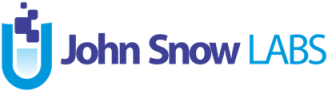

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/Saving_Checkpoints.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest


In [ ]:
!pip install "langtest[openai,transformers]" 

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
from langtest import Harness

c:\Users\raksh\anaconda3\envs\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (ex: disinformation-test)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path (ex: openai, azure-openai, ai21, cohere etc.)</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# Saving and Loading the Checkpoints

The `run` method in the `Harness` class is responsible for executing tests on the model using generated test cases. It supports checkpointing to save intermediate results, batch processing, and the option to specify a directory for saving checkpoints and intermediate results. It  serves the purpose of managing checkpoints for storing and recovering the progress of a task, specifically when dealing with partial results in batches. It ensures data integrity and provides a mechanism for potential recovery in case of interruptions or failures during task execution.

## Important Parameters

### 1. `checkpoint (bool)`
- **Description**: If True, enable checkpointing to save intermediate results.
- **Default Value**: `False`

### 2. `batch_size (int)`
- **Description**: Batch size for dividing test cases into batches.
- **Default Value**: `500`

### 3. `save_checkpoints_dir (str)`
- **Description**: Directory to save checkpoints and intermediate results.
- **Default Value**: `"checkpoints"`

# Load Checkpoints Method Explanation

The `load_checkpoints` method in the `Harness` class is responsible for loading checkpoints and other necessary data to recreate a `Harness` object. This method is particularly useful for resuming tasks from previously saved checkpoints.

## Important Parameters

### 1. `task`
- **Description**: The task for which the model was tested.

### 2. `model`
- **Description**: The model or models used for testing. It can be a single model or a dictionary of model names and corresponding configurations.

### 3. `save_checkpoints_dir (str)`
- **Description**: Directory containing saved checkpoints and data.



# Initializing Harness 

In [5]:
harness = Harness(task="text-classification", model = {"model": "lvwerra/distilbert-imdb" , "hub":"huggingface"})

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


In [6]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.75},
                          'dyslexia_word_swap':{'min_pass_rate': 0.75},
                          'add_abbreviation':{'min_pass_rate': 0.75},
                          'add_slangs':{'min_pass_rate': 0.75},
                          'add_speech_to_text_typo':{'min_pass_rate': 0.75},
                          'add_ocr_typo':{'min_pass_rate': 0.75},
                          'adjective_synonym_swap':{'min_pass_rate': 0.75},
                          'adjective_antonym_swap':{'min_pass_rate': 0.75}
                        }
          }
 }
)

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.75},
   'dyslexia_word_swap': {'min_pass_rate': 0.75},
   'add_abbreviation': {'min_pass_rate': 0.75},
   'add_slangs': {'min_pass_rate': 0.75},
   'add_speech_to_text_typo': {'min_pass_rate': 0.75},
   'add_ocr_typo': {'min_pass_rate': 0.75},
   'adjective_synonym_swap': {'min_pass_rate': 0.75},
   'adjective_antonym_swap': {'min_pass_rate': 0.75}}}}

In [7]:
harness.data=harness.data[:50]

### Generating the test cases.

In [8]:
harness.generate()

c:\Users\raksh\anaconda3\envs\test\Lib\site-packages\transformers\tokenization_utils_base.py:2453: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(
Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

By utilizing the checkpointing mechanism in the `run` method, it allows users to save test results periodically, enabling seamless resumption from the last checkpoint in case of errors, crashes, or rate-limiting issues during execution.


In [9]:
harness.run(checkpoint=True, batch_size=20,save_checkpoints_dir="imdb-checkpoint")

Running testcases... :  50%|█████     | 10/20 [00:03<00:03,  3.20it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 harness.run(checkpoint=True, batch_size=20,save_checkpoints_dir="imdb-checkpoint")           │
│   2                                                                                              │
│                                                                                                  │
│ D:\dataset\langtest\langtest\langtest.py:370 in run                                              │
│                                                                                                  │
│    367 │   │   │   │   │   self._generated_results = []                                          │
│    368 │   │   │   │                                                                             │
│    369 │   │   │   │   for i, batch in self.batches.items():                                     │
│ ❱  370 │   │   │   │   │   batch_results = TestFactory.run(                                      │
│    371 │   │   │   │   │   │   batch,                                                            │
│    372 │   │   │   │   │   │   self.model,                                                       │
│    373 │   │   │   │   │   │   is_default=self.is_default,                                       │
│                                                                                                  │
│ D:\dataset\langtest\langtest\transform\__init__.py:188 in run                                    │
│                                                                                                  │
│    185 │   │                                                                                     │
│    186 │   │   """                                                                               │
│    187 │   │   async_tests = TestFactory.async_run(samples_list, model_handler, **kwargs)        │
│ ❱  188 │   │   temp_res = asyncio.run(async_tests)                                               │
│    189 │   │   results = []                                                                      │
│    190 │   │   for each in temp_res:                                                             │
│    191 │   │   │   if hasattr(each, "_result"):                                                  │
│                                                                                                  │
│ c:\Users\raksh\anaconda3\envs\test\Lib\site-packages\nest_asyncio.py:31 in run                   │
│                                                                                                  │
│    28 │   │   loop.set_debug(debug)                                                              │
│    29 │   │   task = asyncio.ensure_future(main)                                                 │
│    30 │   │   try:                                                                               │
│ ❱  31 │   │   │   return loop.run_until_complete(task)                                           │
│    32 │   │   finally:                                                                           │
│    33 │   │   │   if not task.done():                                                            │
│    34 │   │   │   │   task.cancel()                                                              │
│                                                                                                  │
│ c:\Users\raksh\anaconda3\envs\test\Lib\site-packages\nest_asyncio.py:93 in run_until_complete    │
│                                                                                                  │
│    90 │   │   │   if f is not future:                                                            │
│    91 │   │   │   │   f._log_destroy_pending = False       

### Loading the Checkpoint

The `load_checkpoints` method facilitates the direct loading of saved checkpoints and data, providing a convenient mechanism to resume testing tasks from the point where they were previously interrupted, even in the event of runtime failures or errors.


In [13]:
harness = Harness.load_checkpoints(save_checkpoints_dir="imdb-checkpoint",
                                   task="text-classification",
                                   model = {"model": "lvwerra/distilbert-imdb" , "hub":"huggingface"}, )

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_abbreviation": {
    "min_pass_rate": 0.75
   },
   "add_ocr_typo": {
    "min_pass_rate": 0.75
   },
   "add_slangs": {
    "min_pass_rate": 0.75
   },
   "add_speech_to_text_typo": {
    "min_pass_rate": 0.75
   },
   "adjective_antonym_swap": {
    "min_pass_rate": 0.75
   },
   "adjective_synonym_swap": {
    "min_pass_rate": 0.75
   },
   "dyslexia_word_swap": {
    "min_pass_rate": 0.75
   },
   "uppercase": {
    "min_pass_rate": 0.75
   }
  }
 }
}


In [16]:
harness.run()

Running testcases... : 100%|██████████| 340/340 [02:04<00:00,  2.73it/s]


In [17]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,add_slangs,I have just wasted my Saturday night watching ...,I have just wasted my Saturday night watching ...,NEGATIVE,NEGATIVE,True
1,robustness,add_slangs,Night Of The Demons is definitely one the defi...,Night Of The Demons is totes one the definitiv...,POSITIVE,POSITIVE,True
2,robustness,add_slangs,A handful of nubile young college sorority sis...,A handful of nubile young college sorority sis...,NEGATIVE,NEGATIVE,True
3,robustness,add_slangs,This is without a doubt the most stunning and ...,This is without a doubt the most stunning and ...,POSITIVE,POSITIVE,True
4,robustness,add_slangs,"I`ve seen this movie twice, both times on Cine...","I`ve seen this flicks twice, both times on Cin...",POSITIVE,POSITIVE,True
...,...,...,...,...,...,...,...
395,robustness,dyslexia_word_swap,"Pepe le Moko, played by Charles Boyer, is some...","Pepe le Moko, played bye Charles Boyer, is sum...",NEGATIVE,NEGATIVE,True
396,robustness,dyslexia_word_swap,"This movie was OK, as far as movies go. It cou...","This movie was OK, as far as movies go. It wou...",NEGATIVE,NEGATIVE,True
397,robustness,dyslexia_word_swap,"First, I don't see how the movie is on any ""be...","First, I don't sea how the movie is on any ""be...",NEGATIVE,NEGATIVE,True
398,robustness,dyslexia_word_swap,I remember seeing the very first trailer for U...,I remember seeing the very first trailer four ...,NEGATIVE,NEGATIVE,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results
We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_slangs,3,47,94%,75%,True
1,robustness,add_speech_to_text_typo,1,49,98%,75%,True
2,robustness,add_ocr_typo,5,45,90%,75%,True
3,robustness,adjective_synonym_swap,2,48,96%,75%,True
4,robustness,adjective_antonym_swap,6,44,88%,75%,True
5,robustness,dyslexia_word_swap,1,49,98%,75%,True
6,robustness,add_abbreviation,2,48,96%,75%,True
7,robustness,uppercase,0,50,100%,75%,True
